<a href="https://colab.research.google.com/github/yogeshsachdeva223/Big-Data-Analytics-Project-on-Airlines-Delay-Dataset-using-Python/blob/main/Version-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Big Data & Data Analytics Project on Airlines Delay Dataset using Python</h1>
<p>By Yogesh Sachdeva, Akhil Sharma and Dhruv Khosla</p>
<h2>Introduction</h2>
<p>In this project we tried to explore and visualize the airlines-delay dataset using python to test and train our machine leanring model.</p>
<h2>Objectives of the Project:</h2>
<p>1. Exploration & Visualizion the data <br>2. To examine if data has any structure<br>3. To do the Feature Engineering of data<br>4. To create the Data Pipelining<br>5. Perform the Hyperparameter tuning</p>
<h2>About Dataset</h2>
<p>The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly Air Travel Consumer Report, published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.</p>


# This dataset is composed by the following variables:

1.	**Year**	2008
2.	**Month**	1-12
3.	**DayofMonth**	1-31
4.	**DayOfWeek**	1 (Monday) - 7 (Sunday)
5.	**DepTime**	actual departure time (local, hhmm)
6.	**CRSDepTime**	scheduled departure time (local, hhmm)
7.	**ArrTime**	actual arrival time (local, hhmm)
8.	**CRSArrTime**	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**	unique carrier code
10.	**FlightNum**	flight number
11.	**TailNum** plane tail number: aircraft registration, unique aircraft identifier
12.	**ActualElapsedTime**	in minutes
13.	**CRSElapsedTime**	in minutes
14.	**AirTime**	in minutes
15.	**ArrDelay**	arrival delay, in minutes: **A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).** 
16.	**DepDelay**	departure delay, in minutes
17.	**Origin**	origin IATA airport code
18.	**Dest**	destination IATA airport code
19.	**Distance**	in miles
20.	**TaxiIn**	taxi in time, in minutes
21.	**TaxiOut**	taxi out time in minutes
22.	**Cancelled**	*was the flight cancelled
23.	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**	1 = yes, 0 = no
25.	**CarrierDelay**	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26.	**WeatherDelay**	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27.	**NASDelay**	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
28.	**SecurityDelay**	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29.	**LateAircraftDelay**	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

## Install packages

In [2]:
# 0.0 
#Install recent version of sklearn for visualizing pipelines
!pip install --upgrade scikit-learn

# 0.1
# For skopt routines
! pip install scikit-optimize

# 0.2 For plotting skopt results
! pip install 'scikit-optimize[plots]'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Call libraries
(#1--#2.0)

In [3]:
# 1.0 Clear ipython memory
#%reset -f

# 1.1 Data manipulation and plotting modules
import numpy as np
import pandas as pd

# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

## Transformers for predictors:

# 1.9 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.10 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder 


## Estimator

# 1.11 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.12 To plot graphs and pipeline diagram
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import set_config

In [4]:
# 1.13 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.14
from xgboost import plot_importance

# 1.15 Permutation feature importance
from sklearn.inspection import permutation_importance

In [5]:
# 1.16 Misc
import time
import os
import gc
import random

# 1.17 Used in Randomized parameter search
from scipy.stats import uniform

In [6]:
# 1.18
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.19 Import warnings module
#     No FutureWarnings display
 
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")

In [7]:
# 1.20 Set option to dislay many rows
pd.set_option('display.max_columns', 100)

In [8]:
# 1.21 
from google.colab import drive
# Path where to mount MyDrive
# We will mount it at /content/driveesh
# This drive will be created
drive.mount('/content/drive')

Mounted at /content/drive


# Reading & Preprocessing the data to uderstand the data structure and perform the feature engineering

In [9]:
################# Reading the data #################

#2.1 Reading the data file
df = ad = pd.read_csv("/content/drive/MyDrive/BDDA/Mid Term Project Datasets/Airlines Delay Dataset/DelayedFlights.csv")



In [10]:
# 2.2 Have a look at the data
df.head()
print("\n-----\n")
df.dtypes
print("\n------\n")
df.dtypes.value_counts()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN



-----



Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


------



float64    14
int64      11
object      5
dtype: int64

In [11]:
print('Data Shape:', df.shape)


Data Shape: (1936758, 30)


In [12]:
# Remove column name 'Unnamed: 0'
df=df.drop(['Unnamed: 0'], axis=1)

In [13]:
df= df.dropna()


In [14]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,2008.0,6.065399e+00,1.572542e+01,3.980082e+00,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,1.353779e+02,1.317641e+02,1.074203e+02,6.329104e+01,5.967721e+01,7.415867e+02,7.297232e+00,2.066033e+01,0.0,0.0,1.917943e+01,3.703355e+00,1.502162e+01,9.013728e-02,2.529649e+01
std,0.0,3.508937e+00,8.793008e+00,1.993270e+00,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,7.229636e+01,6.953201e+01,6.817454e+01,6.075380e+01,5.986881e+01,5.593643e+02,6.033239e+00,1.667983e+01,0.0,0.0,4.354624e+01,2.149153e+01,3.383308e+01,2.022716e+00,4.205489e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,1.500000e+01,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,8.300000e+01,8.000000e+01,5.800000e+01,2.600000e+01,2.400000e+01,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,1.180000e+02,1.150000e+02,9.000000e+01,4.300000e+01,4.100000e+01,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,1.670000e+02,1.610000e+02,1.360000e+02,7.900000e+01,7.500000e+01,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


## Data Visualization

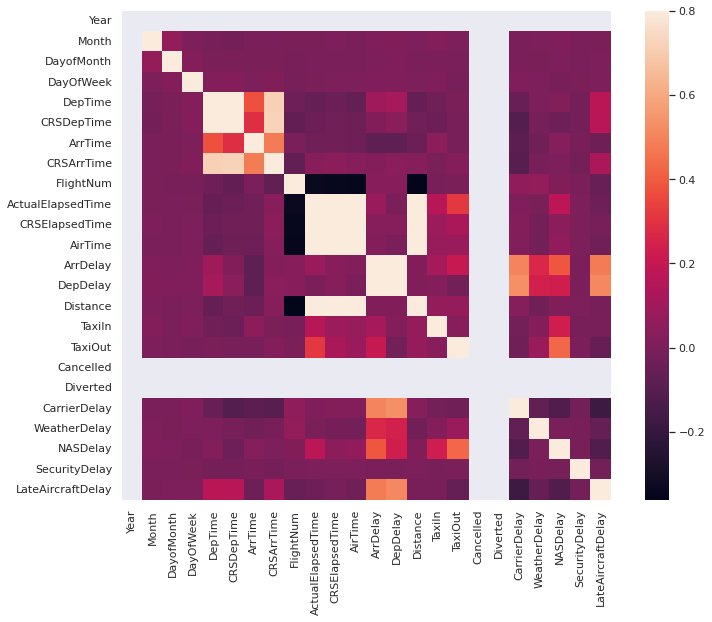

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

### Through the correlation matrix we can see how some of the 29 variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. In order to have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.

### We can also make the following observations: 

#### 1. Only when Arrival Delay is longer than 15 minutes there's data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancelation or diversion there's no data related to delay causes. 

#### 2. More often than not, airports and carriers allocate a CRSElapsedTime higher than the actual time spent in the Taxi In + Taxi out + Airtime operations (Actual Elapsed Time). This is the reason why, when planes take off on time, landing usually takes place before the expected time! It also allows to absorb delay by late aircraft down the lane of chained flights. 

In [15]:

# creating new variables and renaming 
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
    
#Cancellation cause
df.loc[df["CancellationCode"] =="A", 'CancellationCode'] = "0"
df.loc[df["CancellationCode"] =="B", 'CancellationCode'] = "1"
df.loc[df["CancellationCode"] =="C", 'CancellationCode'] = "2"

# dropping the unwanted data   
df = df.drop("Year",1) #Converted to date
df = df.drop("DayofMonth",1) #Converted to date
df = df.drop("DepTime",1) #Of the departure data we only keep the expected 
df = df.drop("DepDelay",1)
df = df.drop("ArrTime",1)
df = df.drop("CRSArrTime",1)
df = df.drop("ActualElapsedTime",1)
df = df.drop("CRSElapsedTime",1)
df = df.drop("Diverted",1)
df = df.drop("Cancelled",1)
df = df.drop("Distance",1)
df = df.drop("FlightNum",1)
df = df.drop("TailNum",1)
# df = df.drop("Origin",1)
# df = df.drop("Dest",1)
# df = df.drop("UniqueCarrier",1)
# df = df.drop("CancellationCode",1)

Text(0.5, 1.0, 'Status')

Text(0, 0.5, '')

Text(0.5, 1.0, 'Status')

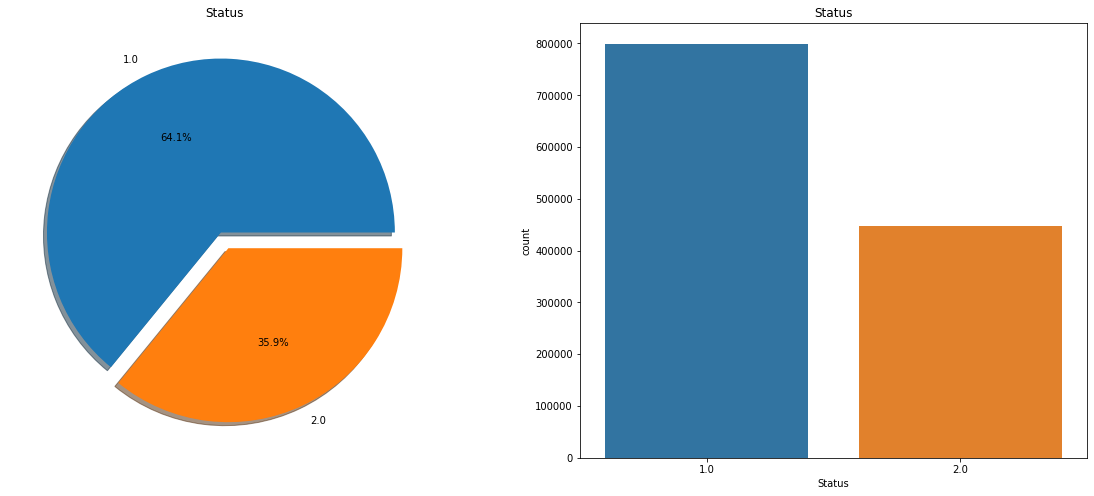

Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)


In [17]:
f,ax=plt.subplots(1,2,figsize=(20,8))
df['Status'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',order = df['Status'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

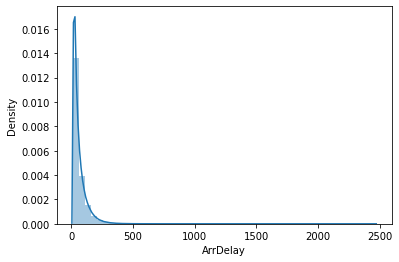

In [18]:
Delayedflights = df[(df.Status >= 1) &(df.Status < 3)]
sns.distplot(Delayedflights['ArrDelay'])
plt.show()

In [19]:
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ArrDelay'].skew())
print("Kurtosis: %f" % Delayedflights['ArrDelay'].kurt())


Skewness: 4.059888
Kurtosis: 40.382752



### It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time. 

Text(0.5, 1.0, 'Average delay by month')

Text(0.5, 1.0, 'Number of minutes delayed by month')

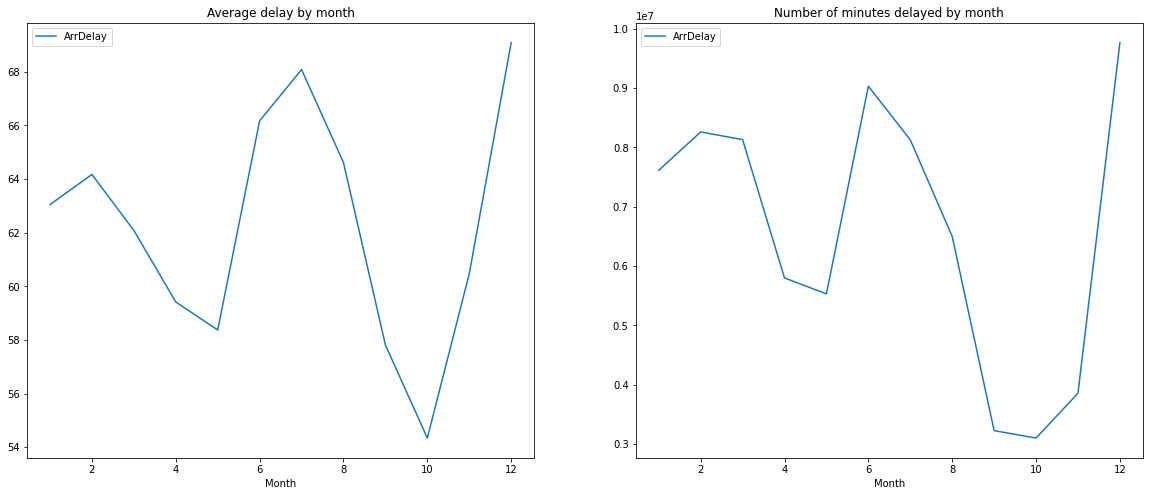

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['Month','ArrDelay']].groupby(['Month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['Month','ArrDelay']].groupby(['Month']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

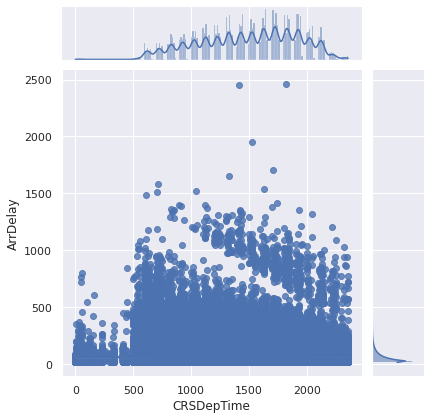

In [ ]:
sns.jointplot(x='CRSDepTime',y='ArrDelay',data=Delayedflights,kind='reg', color='b',fit_reg = True)
plt.show()

### Delays focused on February, June and December, with a peak on average delays on July 2008.
### Regarding the time of the day the take off was programmed, it can be seen in the higher part of the scatterplot how the delays are concentrated in an hourly manner, focused on the hour. As the day goes on, there are more and more delays, but as it's shown in the center of the scatterplot, the delayed flights get divided into two groups: one with longer delays and other with shorter. One likely interpretation is that the delays generated by previous flights either increase or decrease in each following trip. 

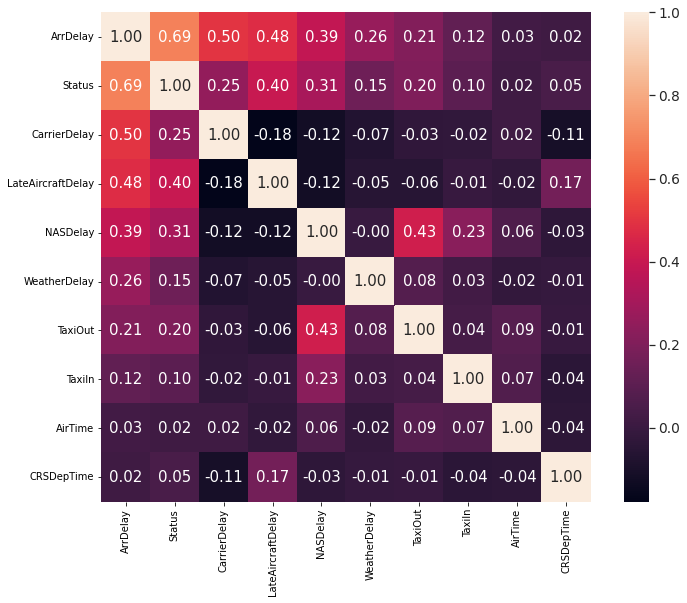

In [21]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ArrDelay')['ArrDelay'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

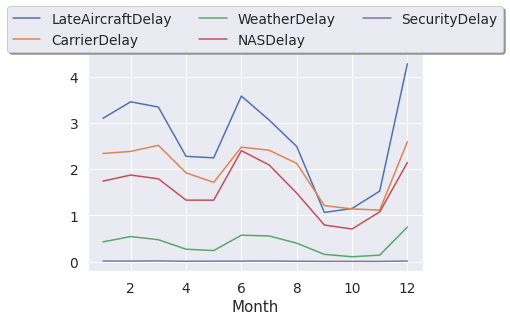

In [22]:
df2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

#### The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and NAS Delay. The graph corroborates this assumption, showing how those three variables create most of delays during the year.

In [ ]:
#scatterplot
sns.set()
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

KeyboardInterrupt: ignored

## Conclusion
##### Late Aircraft Delay seems to be the most important variable, not only due to its longer wait periods, but it's affected by the others due to the ripple effect and delay propagation. Its distribution is almost parallel to NAS Delay, and seems to be the compounded effect of the other delays minus the delay reduction from the alloted Elapsed time > Actual Elapsed Time in the flight operations.
##### However, analyzing the scatterplot, it doesn't seem to be a significant correlation between the types of delay themselves.

# Creating the Data Pipeline

In [23]:
# Divide data into predictors and target
#     First 17 columns are predictors

#X = df.iloc[ :, 0:17]
#X.head(10)

# 17th index or 18th column is target
print("\n\nTarget,y, values")
y = df.iloc[ :, 17]  
y.head()



Target,y, values


3     1.0
5     1.0
7     2.0
9     1.0
11    1.0
Name: Status, dtype: float64

In [24]:
df.columns

Index(['Month', 'DayOfWeek', 'CRSDepTime', 'UniqueCarrier', 'AirTime',
       'ArrDelay', 'Origin', 'Dest', 'TaxiIn', 'TaxiOut', 'CancellationCode',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepDate', 'Status'],
      dtype='object')

In [25]:
cat_cols = ['UniqueCarrier','Origin','Dest','CancellationCode']
#num_cols = ['Month', 'DayOfWeek', 'CRSDepTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut',
#      'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
#     'LateAircraftDelay', 'Status']
num_cols = ['Month', 'DayOfWeek', 'CRSDepTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Status']

In [26]:
X = np.hstack([cat_cols,num_cols])

In [28]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#X[cat_cols] = X[cat_cols].apply(le.fit_transform)

In [29]:
# Create pipe for both numerical as also categorical data
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', ss()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [30]:
# Test each pipe
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

array([[-1.4435712 ,  0.00999246,  0.63405707, ..., -0.04456253,
         0.15939913, -0.74834648],
       [-1.4435712 ,  0.00999246,  0.81212905, ..., -0.04456253,
         0.516076  , -0.74834648],
       [-1.4435712 ,  0.00999246,  0.05235528, ..., -0.04456253,
         1.11053744,  1.33627941],
       ...,
       [ 1.69128235,  1.01336944, -0.6361897 , ..., -0.04456253,
        -0.07838545, -0.74834648],
       [ 1.69128235,  1.01336944, -2.10825138, ..., -0.04456253,
        -0.60151152,  1.33627941],
       [ 1.69128235,  1.01336944, -1.521801  , ..., -0.04456253,
         1.27698665,  1.33627941]])

<1247486x624 sparse matrix of type '<class 'numpy.float64'>'
	with 4989944 stored elements in Compressed Sparse Row format>

In [31]:
# Now put the two pipes within one column-transformer
ct = ColumnTransformer([ 
                        ('nc_pipe',nc_pipe,num_cols), 
                        ('cat_pipe',cat_pipe,cat_cols)
                        ])

In [32]:
# Test this column transformer pipe
ct.fit_transform(df)

<1247486x637 sparse matrix of type '<class 'numpy.float64'>'
	with 21207262 stored elements in Compressed Sparse Row format>

In [33]:
# Final pipe to bring in the column-transformer followed by estimator

pt = Pipeline([ 
                ('ct',ct), 
                ('dt',DecisionTreeClassifier())
])

In [35]:
#X.head()

In [ ]:

# 3.3.2 Can we change datatype to float32 ?
#       Check.
X.min().min()           # -999.0
X.max().max()           # 4543.913

# 3.3.3  Save memory
X = X.astype('float32')

TypeError: ignored

In [ ]:
no run
# 3.4 Transform label data to '1' and '0'
#    'map' works element-wise on a Series.
y = y.map({'b':1, 's' : 0})
y.dtype           # int64


# 3.5 Store column names somewhere
#     for use in feature importance

colnames = X.columns.tolist()

dtype('float64')

In [ ]:
df

,Month,DayOfWeek,CRSDepTime,UniqueCarrier,AirTime,ArrDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate,Status
3,1,4,1755,WN,77.0,34.0,IND,BWI,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0,2008-01-03,1.0
5,1,4,1830,WN,230.0,57.0,IND,LAS,3.0,7.0,N,10.0,0.0,0.0,0.0,47.0,2008-01-03,1.0
7,1,4,1510,WN,107.0,80.0,IND,MCO,6.0,8.0,N,8.0,0.0,0.0,0.0,72.0,2008-01-03,2.0
9,1,4,1425,WN,213.0,15.0,IND,PHX,7.0,8.0,N,3.0,0.0,0.0,0.0,12.0,2008-01-03,1.0
11,1,4,1255,WN,110.0,16.0,IND,TPA,4.0,9.0,N,0.0,0.0,0.0,0.0,16.0,2008-01-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,12,6,830,DL,82.0,64.0,ATL,PBI,8.0,21.0,N,51.0,0.0,13.0,0.0,0.0,2008-12-13,2.0
1936752,12,6,1520,DL,27.0,17.0,HSV,ATL,9.0,7.0,N,0.0,0.0,0.0,0.0,17.0,2008-12-13,1.0
1936753,12,6,1220,DL,120.0,25.0,MSP,ATL,9.0,18.0,N,3.0,0.0,0.0,0.0,22.0,2008-12-13,1.0
1936754,12,6,600,DL,78.0,75.0,RIC,ATL,15.0,34.0,N,0.0,57.0,18.0,0.0,0.0,2008-12-13,2.0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

# 4.1
X_train.shape        # (810865, 17)
X_test.shape         # (436621, 17)
y_train.shape        # (810865,)
y_test.shape         # (436621,)

ValueError: ignored

## Create a pipeline
Create a pipeline for data processing and modeling. We will then use `Grid Search` and `Random Search` to find best set of parameters for this pipeline.

In [ ]:

################# CC. Create pipeline #################
#### Pipe using XGBoost


# 5.0 Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# 5.1  Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

# 5.2 Another way to create pipeline:
#     Not used below

#pipe_xg1 = make_pipeline (
#                          ss(),
#                          PCA(),
#                          XGBClassifier(silent = False,
#                                        n_jobs=2)
#                          )



### Grid Search code to discover best pipeline parameters
For a cmprehensive coverage of xgboost parameters and what they imply, please see [here](https://xgboost.readthedocs.io/en/latest/parameter.html) and also [here](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) .

In [ ]:
##################### DD. Grid Search #################

# 6.  Specify xgboost parameter-range
# 6.1 Dictionary of parameters (16 combinations)
#     Syntax: {
#              'transformerName__parameterName' : [ <listOfValues> ]
#              }
#
# 6.2 What parameters in the pipe are available for tuning

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()




--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

#### Define parameter space
Now that we know which parameters can be tuned, specify parameter space

In [ ]:
# 6.3 Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [10,17],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2



In [ ]:
# 6.3.1 Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [10,17],
               }                               # Total: 2 * 2 * 2 * 2


#### Instantiate GridSearchCV class

In [ ]:
# 7  Grid Search (16 * 2) iterations
#    Create Grid Search object first with all necessary
#    specifications. Note that data, X, as yet is not specified

#    Data Leakage and pipelining:
#    Pipeline avoids data leakage during GridSearch
#    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [ ]:
## 7.1 Delete objects not needed
#      We need X_train, y_train, X_test, y_test
del X
del df
del y
gc.collect()

507

#### Model fitting

In [ ]:
# 7.2. Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60               # 4 minutes



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


TypeError: ignored

In [ ]:
# 7.3
f"Best score: {clf.best_score_} "            # 'Best score: 0.8804992694908675 '

# 7.3.1
print()
f"Best parameter set {clf.best_params_}"

In [ ]:
# 7.4. Make predictions using the best returned model
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354

# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [ ]:
# 7.9 Get feature importances from GridSearchCV best fitted 'xg' model
#     See stackoverflow: https://stackoverflow.com/q/48377296

print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

In [ ]:
# 7.10 Create a dataframe of feature importances
#      with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp

In [ ]:
# 7.11 First five columns with least feature importance are:

list(df_imp.index.values[:5])

In [ ]:
# 8.0 Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# 8.1 Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                     )

# 8.2
start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60               # 25 minutes

# 8.3 Make predictions
y_pred_dr = clf_dr.predict(Xtest)

# 8.4 Compare results.
#      Results may be marginally better
f1_score(y_test,y_pred_dr, pos_label = 1)      # 0.8664199696263183
f1_score(y_test,y_pred_dr, pos_label = 0)      # 0.729313857223354
f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183
f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354
##################################


In [ ]:
##################### EE. Randomized Search #################

# Tune parameters using randomized search
# 9.0 Hyperparameters to tune and their ranges
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(20,30)}

In [ ]:
# 9.1 Tune parameters using random search
#     Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )


In [ ]:
# 9.2 Run random search for 25 iterations. 21 minutes:

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 4 minutes

In [ ]:
# 9.3 Evaluate
f"Best score: {rs.best_score_} " ;print()           # 'Best score: 0.8780097831252602 '
f"Best parameter set: {rs.best_params_} " ; print()


# 9.4 Make predictions from the best returned model
y_pred = rs.predict(X_test)


# 9.5 Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      # 'Accuracy: 82.0142648448913'
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" ; print()     # 0.8655661892221722


In [ ]:
# 10.0 Laydown search space of parameters     
# https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769

params={
         'min_child_weight': Integer(0, 50),
         'max_depth': Integer(1, 10),
         'subsample': Real (0.5, 1.0, 'uniform'),
         'colsample_bytree': Real(0.5, 1.0, 'uniform'),
         'reg_lambda':Real(1e-5,100,prior = 'log-uniform'),
         'reg_alpha': Real(1e-5,100,prior= 'log-uniform'),
         'gamma': Real(1e-9, 0.5, 'log-uniform'),
         'learning-rate': Real(0.01,0.2,prior='log-uniform'),
         'scale_pos_weight': Real(1e-6, 500, 'log-uniform'),
         'n_estimators': Integer(50, 100)
        }

In [ ]:
# 10.1 Define our classifier:
bayes_tuner=BayesSearchCV(
                            XGBClassifier(
                                            n_jobs = 1,
                                            objective = 'binary:logistic',
                                            eval_metric = 'auc',
                                            silent=1,
                                            tree_method='approx'
                                            ),
                            params,
                            n_iter=5,              # No of parameter settings that are tried 
                            scoring='roc_auc',     # List of scores CANNOT be used
                            cv = StratifiedKFold(
                                                  n_splits=3,
                                                  shuffle=True,
                                                  random_state=42
                                                ),
                            refit = True, # Refit the best estimator so as to make predictions
                            verbose = 1,
                            return_train_score= True
                    )


In [ ]:
# 10.2 This function is called after each parameter
#      fitting to print current status:

def status_print(optim_result):
  """Status callback durring bayesian hyperparameter search"""

  # 10.2.1 Get all the models tested so far in DataFrame format
  # cv_results_: A dict with keys as column headers and
  #              values as columns
  #        model_results dataframe is not being printed
  model_results = pd.DataFrame(bayes_tuner.cv_results_)    
  
  # 10.2.2 Get current parameters and the best parameters   
  # best_params_: A dict of parameter settings that 
  #               give the best results on the hold out data. 
  best_params = pd.Series(bayes_tuner.best_params_)
  
  print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(model_results),
        np.round(bayes_tuner.best_score_, 4),  # Score of best_estimator on the left out data.
        bayes_tuner.best_params_
    ))

In [ ]:
# 11.0 Begin parameter tuning

start = time.time()
res=bayes_tuner.fit(
                      X_train,
                      y_train,
                      #callback=status_print
                    )

end = time.time()
(end - start)/60   # 3 minutes on Colab

In [ ]:
# 11.1 Get results
# https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html
res.best_estimator_


In [ ]:
# 11.2
res.best_score_


In [ ]:
# 11.3
res.best_params_